In [1]:
import warnings
import sys
import os

warnings.filterwarnings('ignore')
os.environ["CUDA_VISIBLE_DEVICES"] = ''
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.95'
os.environ['JAX_PLATFORMS'] = 'cpu'
sys.path.append('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/')

import jax.numpy as jnp
import pandas as pd
from utils import parse_run, read_meta_data, df_threshold_residuals
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [4]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
dir_ = 'f64_scipy_23.09'
df = pd.read_csv(os.path.join(path, dir_, 'meta_data.csv'), index_col=0)

In [10]:
df.query('variance == 0.7 and lhs_type == "l_ilu0"')

,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,precision,prec_inverse,loss_type,cg_valid_repeats,train_loss_last,test_loss_last,alpha,time_data,time_train,iters_mean_1e_3,iters_mean_1e_6,iters_mean_1e_9,iters_mean_1e_12,iters_std_1e_3,iters_std_1e_6,iters_std_1e_9,iters_std_1e_12,time_mean_1e_3,time_mean_1e_6,time_mean_1e_9,time_mean_1e_12,time_std_1e_3,time_std_1e_6,time_std_1e_9,time_std_1e_12
99s9u9,div_k_grad,32.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,f64,False,llt,350.0,127.687114,128.343135,-0.065722,15.937599,1289.533886,25.205,33.585,41.505,49.200,0.867741,1.011323,1.118023,1.292285,0.042243,0.053333,0.063792,0.073941,0.078174,0.078445,0.078656,0.078894
cdf5lv,div_k_grad,64.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,f64,False,llt,350.0,460.933630,439.193711,-0.070257,17.331004,4977.969517,42.495,55.170,67.490,79.485,1.688187,2.090718,2.483928,3.011607,0.110281,0.139506,0.167850,0.195466,0.097170,0.098365,0.099437,0.100279
zlirul,div_k_grad,128.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,f64,False,llt,350.0,1746.969604,1722.464358,-0.062498,22.185723,20460.269431,66.765,84.780,101.645,117.770,3.210884,3.464333,3.868976,4.224583,0.568681,0.717592,0.856984,0.990283,0.078423,0.078653,0.078647,0.079440


In [186]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
dir_name = 'f64_scipy_23.09'
# div_k_grad32_64 = pd.read_csv(os.path.join(path, dir_name32_64, 'meta_data.csv'), index_col=0)

run_name_32 = '99s9u9'
run_name_64 = 'cdf5lv'
run_name_128 = 'zlirul'

run_32 = jnp.load(os.path.join(path, dir_name, run_name_32+'.npz'))
run_64 = jnp.load(os.path.join(path, dir_name, run_name_64+'.npz'))
run_128 = jnp.load(os.path.join(path, dir_name, run_name_128+'.npz'))

<Figure size 1300x800 with 0 Axes>

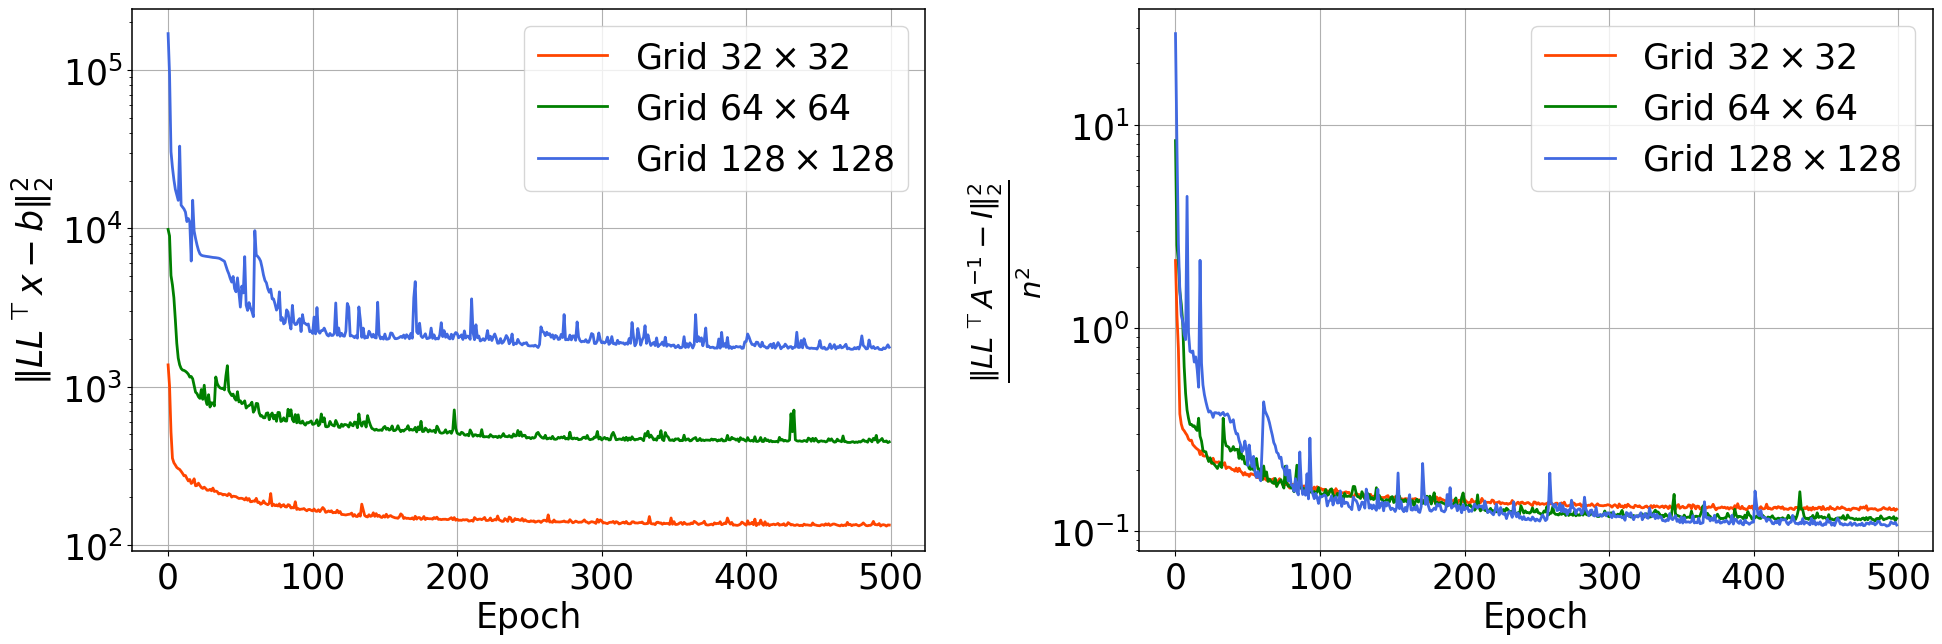

In [190]:
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 1.1#0.8
plt.set_cmap('jet')

_, axes = plt.subplots(1, 2, figsize=(20, 7))

axes[0].plot(range(len(run_32['losses'][0][:500])), run_32['losses'][1][:500], label=r'$\text{Grid} \,\, 32\times32$', linewidth=2, c='orangered')
axes[0].plot(range(len(run_64['losses'][0][:500])), run_64['losses'][1][:500], label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
axes[0].plot(range(len(run_128['losses'][0][:500])), run_128['losses'][1][:500], label=r'$\text{Grid} \,\, 128\times128$', linewidth=2, c='royalblue')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].grid()
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel(r'$\Vert LL^\top x - b \Vert_2^2$');

axes[1].plot(range(len(run_32['losses'][0][:500])), run_32['losses'][1][:500] / (32**2), label=r'$\text{Grid} \,\, 32\times32$', linewidth=2, c='orangered')
axes[1].plot(range(len(run_64['losses'][0][:500])), run_64['losses'][1][:500] / (64**2), label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
axes[1].plot(range(len(run_128['losses'][0][:500])), run_128['losses'][1][:500] / (128**2), label=r'$\text{Grid} \,\, 128\times128$', linewidth=2, c='royalblue')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid()
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel(r'$\frac{\Vert LL^\top A^{-1} - I \Vert_2^2}{n^2}$', fontsize=30);

plt.tight_layout();

In [216]:
run_naive_loss = np.load('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/experiments/for_media_iclr/naive_loss_div_k_grad_64_0.7_ilu0___5000epoch_losses.npz')['first_500_epoch']
run_naive_loss_finetune = np.load('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/experiments/for_media_iclr/naive_loss_div_k_grad_64_0.7_ilu0___last2000epoch_losses.npz')['epoch2000_after_5000']

In [219]:
total_naive_loss = np.hstack([run_naive_loss[1], run_naive_loss_finetune[1]])

<Figure size 1300x800 with 0 Axes>

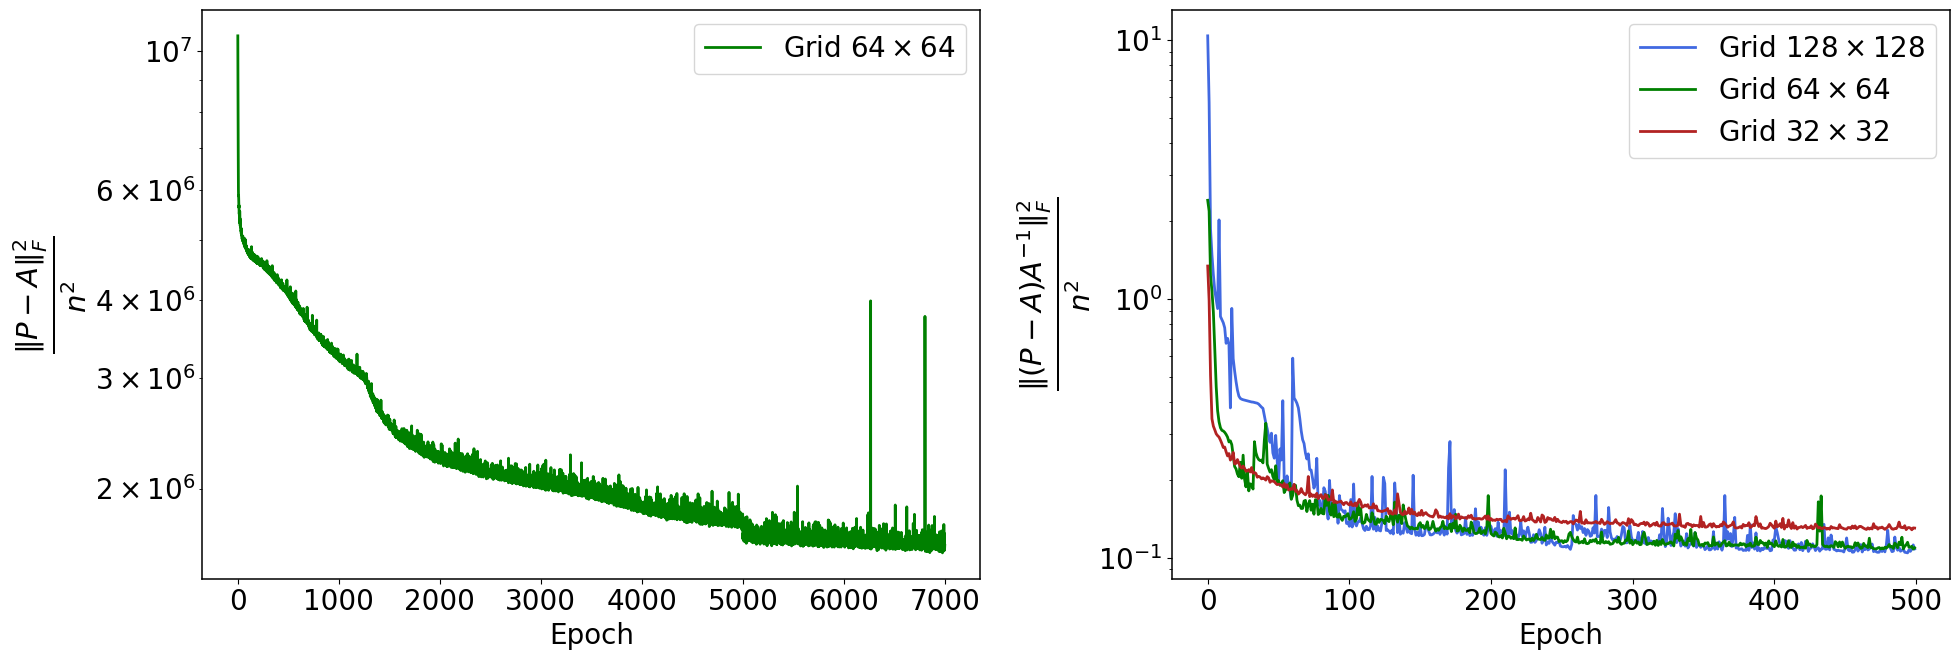

In [229]:
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['font.size'] = 20
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 1.1#0.8
plt.set_cmap('jet')

_, axes = plt.subplots(1, 2, figsize=(20, 7))

# axes[0].plot(range(len(run_naive_loss[0])), run_naive_loss[0], '--', label=r'Train, $\text{grid} \,\, 64\times64$', linewidth=2, c='orangered')
axes[0].plot(range(len(total_naive_loss)), total_naive_loss / (64**2), label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
axes[0].set_yscale('log')
axes[0].legend()
# axes[0].grid()
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel(r'$\frac{\Vert P - A \Vert_F^2}{n^2}$', fontsize=30);

# axes[1].plot(range(len(run_32['losses'][0][:500])), run_32['losses'][0][:500] / (32**2), '--', label=r'Train, $\text{grid} \,\, 32\times32$', linewidth=2, c='orangered')
# axes[1].plot(range(len(run_64['losses'][0][:500])), run_64['losses'][0][:500] / (64**2), '--', label=r'Train, $\text{grid} \,\, 64\times64$', linewidth=2, c='green')
# axes[1].plot(range(len(run_128['losses'][0][:500])), run_128['losses'][0][:500] / (128**2), '--', label=r'Train, $\text{grid} \,\, 128\times128$', linewidth=2, c='royalblue')

axes[1].plot(range(len(run_128['losses'][1][:500])), run_128['losses'][1][:500] / (128**2), label=r'$\text{Grid} \,\, 128\times128$', linewidth=2, c='royalblue')
axes[1].plot(range(len(run_64['losses'][1][:500])), run_64['losses'][1][:500] / (64**2), label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
axes[1].plot(range(len(run_32['losses'][1][:500])), run_32['losses'][1][:500] / (32**2), label=r'$\text{Grid} \,\, 32\times32$', linewidth=2, c='firebrick')

axes[1].set_yscale('log')
axes[1].legend()
# axes[1].grid()
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel(r'$\frac{\Vert (P - A) A^{-1} \Vert_F^2}{n^2}$', fontsize=30);

plt.tight_layout();

In [17]:
import parafields
import numpy as np
import matplotlib.pyplot as plt

field_ls = []
grid = 256
cov_model = 'gaussian'
min_, max_ = 1e9, 1e-9
for var in {0.1, 0.5, 0.7, 1.1}:
    coeff = np.exp(parafields.generate_field(cells=[grid+1, grid+1], covariance=cov_model, variance=var).evaluate())
    field_ls.append(coeff)
    min_ = np.min(coeff) if np.min(coeff) < min_ else min_
    max_ = np.max(coeff) if np.max(coeff) > max_ else max_

In [18]:
plt.rcParams['font.size'] = 12
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 1.5#0.8

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

def make_colorbar(fig, im, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    return

def plots_3(field_ls, min_, max_, figsize, coords_colorbar):
    fig, axes = plt.subplots(2, 2, figsize=figsize)

    im1 = axes[0,0].imshow(field_ls[0], vmin=min_, vmax=max_)#norm=LogNorm(vmin=min_, vmax=max_))
    axes[0, 0].set_title('Variance 0.1')

    im2 = axes[0,1].imshow(field_ls[1], vmin=min_, vmax=max_)#norm=LogNorm(vmin=min_, vmax=max_))
    axes[0, 1].set_title('Variance 0.5')

    im3 = axes[1,0].imshow(field_ls[2], vmin=min_, vmax=max_)#norm=LogNorm(vmin=min_, vmax=max_))#vmin=min_, vmax=max_)
    axes[1, 0].set_title('Variance 0.7')
    
    im4 = axes[1,1].imshow(field_ls[3], vmin=min_, vmax=max_)#norm=LogNorm(vmin=min_, vmax=max_))#vmin=min_, vmax=max_)
    axes[1, 1].set_title('Variance 1.1')
            
#     make_colorbar(fig, im1, axes[0], False)
#     make_colorbar(fig, im2, axes[1], False)
#     make_colorbar(fig, im3, axes[2])

    cbar_ax = fig.add_axes(coords_colorbar)
    fig.colorbar(im4, cax=cbar_ax)
    
    axes = axes.flatten()
    for ax in axes:
        ax.set_yticks([], [])
        ax.set_xticks([], [])
        
    plt.tight_layout()
    plt.show()
    return

/tmp/ipykernel_1177830/3768798891.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

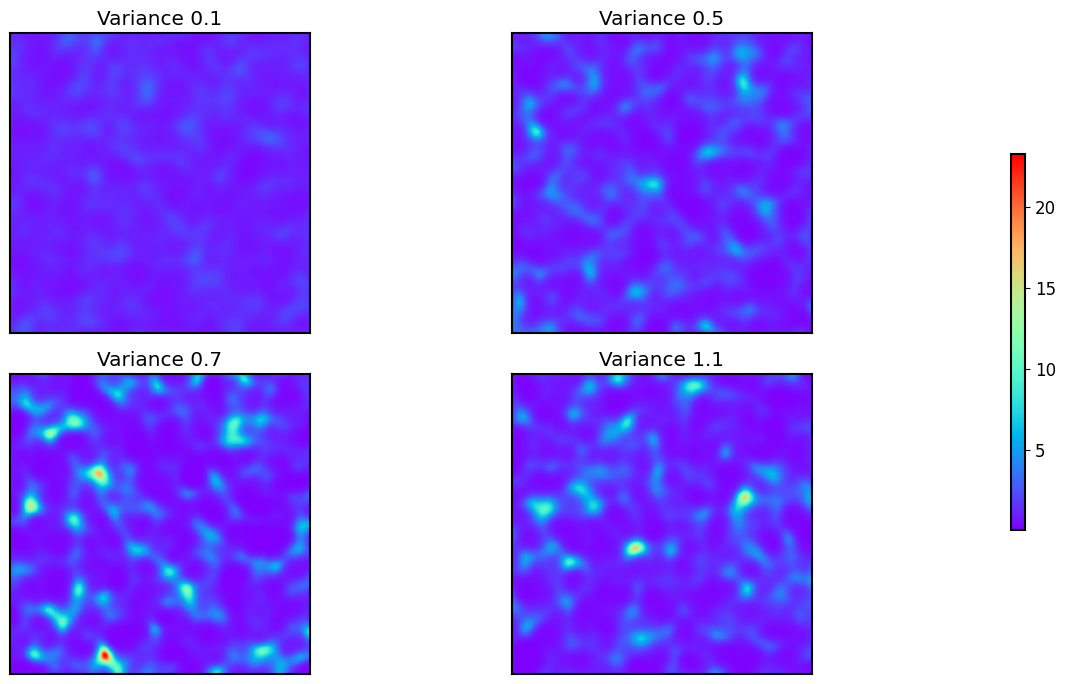

In [19]:
plt.set_cmap('rainbow')
plots_3(field_ls, min_, max_, figsize=(12, 7), coords_colorbar=[1., 0.231, 0.012, 0.537])

In [232]:
2+3

5

In [247]:
import os
path1 = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/experiments/for_media_iclr'

eigen_ic0 = np.load(os.path.join(path1, 'div_k_grad_64_0.7___ic0_spectrum.npz'))
eigen_lhs = np.load(os.path.join(path1, 'div_k_grad_64_0.7___initial_spectrum.npz'))
eigen_naive = np.load(os.path.join(path1, 'naive_loss_div_k_grad_64_0.7_ilu0___all_spectrum.npz'))
eigen_llt = np.load(os.path.join(path1, 'div_k_grad_64_0.7___llt_loss_spectrum.npz'))

In [248]:
eigen_ic0 = eigen_ic0['eigen_values_ic0']
eigen_lhs = eigen_lhs['eigen_values_init_lhs']
eigen_naive = eigen_naive['eigen_values']
eigen_llt = eigen_llt['eigen_llt_loss']

eigen_ic0.sort()
eigen_lhs.sort()
eigen_naive.sort()
eigen_llt.sort()

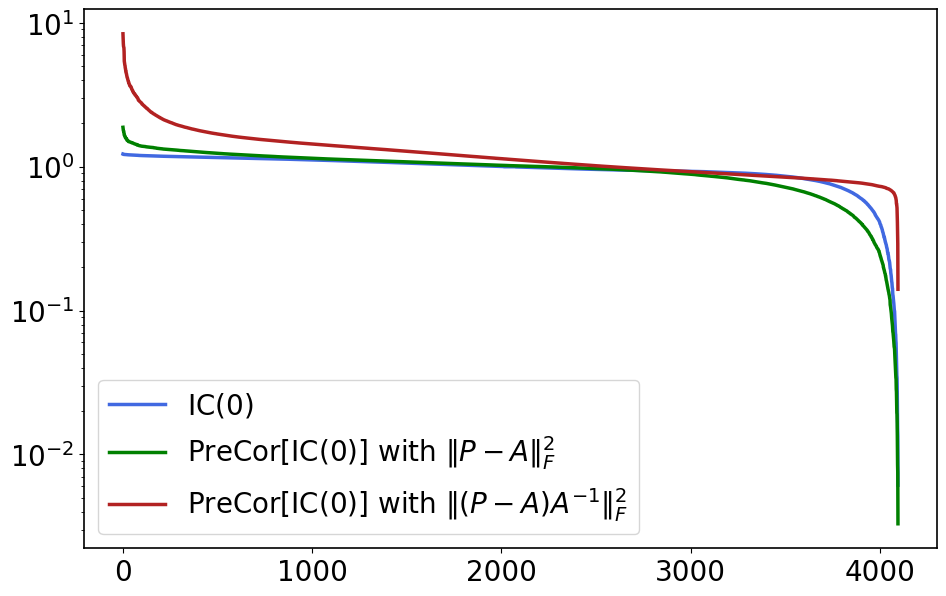

In [295]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.rcParams['font.size'] = 20
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 1.2#0.8
plt.set_cmap('jet')


plt.plot(range(len(eigen_ic0[::-1])), eigen_ic0[::-1], label=r'IC($0$)', c='royalblue', linewidth=2.5)
# plt.plot(range(len(eigen_lhs)), eigen_lhs[::-1], label=r'$A$')
plt.plot(range(len(eigen_naive[::-1])), eigen_naive[::-1], label=r'PreCor[IC(0)] with $\Vert P - A \Vert_F^2$', c='green', linewidth=2.5)
plt.plot(range(len(eigen_llt[::-1])), eigen_llt[::-1], label=r'PreCor[IC(0)] with $\Vert (P - A) A^{-1} \Vert_F^2$', c='firebrick', linewidth=2.5)

plt.yscale('log')
plt.legend();
# axes[1].plot(range(len(run_128['losses'][1][:500])), run_128['losses'][1][:500] / (128**2), label=r'$\text{Grid} \,\, 128\times128$', linewidth=2, c='royalblue')
# axes[1].plot(range(len(run_64['losses'][1][:500])), run_64['losses'][1][:500] / (64**2), label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
# axes[1].plot(range(len(run_32['losses'][1][:500])), run_32['losses'][1][:500] / (32**2), label=r'$\text{Grid} \,\, 32\times32$', linewidth=2, c='firebrick')


<Figure size 1100x700 with 0 Axes>

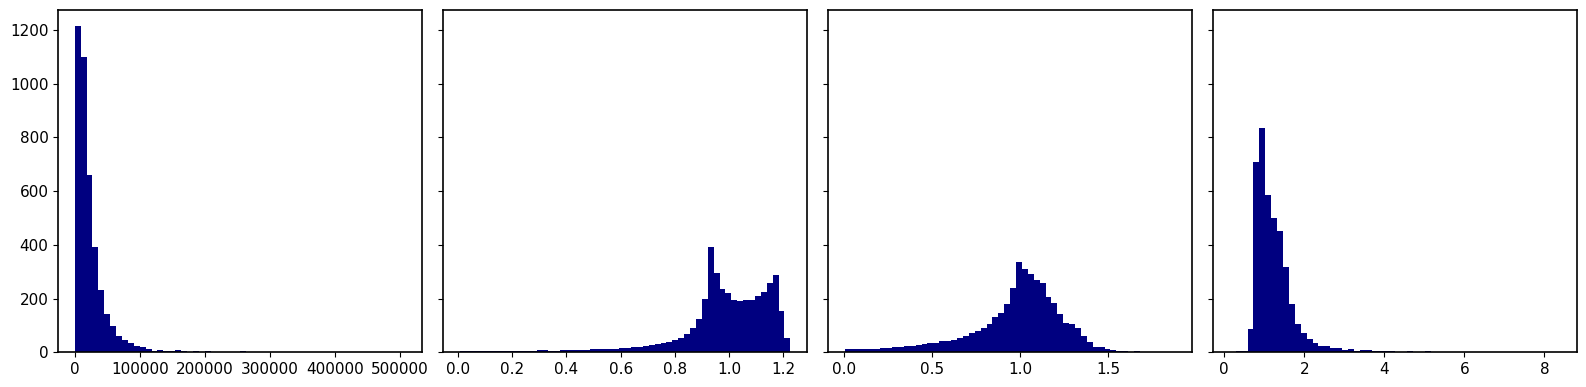

In [338]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 1.2#0.8
plt.set_cmap('jet')

_, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

axes[0].hist(eigen_lhs[::-1], color='navy', bins=56)#, label=r'$A$')#label=r'IC($0$)', color='royalblue', bins=10)#, linewidth=2.5)
axes[1].hist(eigen_ic0[::-1], color='navy', bins=56)#, label=r'IC($0$)')#label=r'IC($0$)', color='royalblue', bins=10)#, linewidth=2.5)
axes[2].hist(eigen_naive[::-1], color='navy', bins=56)#, label=r'$\Vert P - A \Vert_F^2$')#label=r'PreCor[IC(0)] with $\Vert P - A \Vert_F^2$', color='green', bins=10)#, linewidth=2.5)
axes[3].hist(eigen_llt[::-1], color='navy', bins=56)#, label=r'$\Vert (P - A) A^{-1} \Vert_F^2$')#label=r'PreCor[IC(0)] with $\Vert (P - A) A^{-1} \Vert_F^2$', color='firebrick', bins=10)#, linewidth=2.5)

# axes[0].set_title(r'$A$')
# axes[1].set_title(r'IC($0$)')
# axes[2].set_title(r'PreCor[IC(0)] with $\Vert P - A \Vert_F^2$')
# axes[3].set_title(r'PreCor[IC(0)] with $\Vert (P - A) A^{-1} \Vert_F^2$')


# plt.yscale('log')
# axes[0].legend();
# axes[1].legend();
# axes[2].legend();
# axes[3].legend();


plt.tight_layout();